<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sns.get_dataset_names())

C:\Users\marce\anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\marce\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
# importar dataset
# e mostrar 5 linhas aleatórias
df = sns.load_dataset('tips')
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
231,15.69,3.00,Male,Yes,Sat,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
59,48.27,6.73,Male,No,Sat,Dinner,4
121,13.42,1.68,Female,No,Thur,Lunch,2
86,13.03,2.00,Male,No,Thur,Lunch,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [7]:
# Contabilizar mulheres e homens
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [18]:
# Filtro: Valor total > U$20.00
# Retorna 97 linhas
df_tb_above_20 = df[df['total_bill'] > 20.0]
df_tb_above_20.shape[0]

97

In [19]:
# Filtro: Mesas com 3 e 4 pessoas
# Retorna 75 linhas
df_size_bet_3and4 = df[df['size'].isin([3,4])]
df_size_bet_3and4.shape[0]

75

In [10]:
# Filtro: mostrar gorjetas para 
# valores pagos acima de U$40

tips_where_tb_above_40 = df.loc[df['total_bill'] > 40.0, "tip"]
tips_where_tb_above_40

59      6.73
95      4.73
102     2.50
142     5.00
156     5.00
170    10.00
182     3.50
184     3.00
197     5.00
212     9.00
Name: tip, dtype: float64

Text(0, 0.5, '$Tip$')

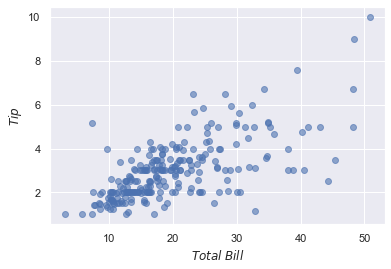

In [11]:
# Correlação gráfica entre 
# o valor total da conta e gorjetas.
sns.set()
plt.scatter(x=df['total_bill'], 
            y=df['tip'],
           alpha=0.60,)
plt.xlabel('$Total$ $Bill$')
plt.ylabel('$Tip$')

In [12]:
# Agrupar média de gorjetas por gênero
df[['sex','tip']].groupby('sex').mean()

,tip
sex,
Male,3.089618
Female,2.833448


In [13]:
# Agrupar média de gorjetas por
# fumantes e não fumantes
df[['smoker','tip']].groupby('smoker').mean()

,tip
smoker,
Yes,3.008710
No,2.991854


In [14]:
# Ordenar valores com base no valor total e gorjetas:
# ordem decrescente
df.sort_values(by=['total_bill', 'tip'], ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [15]:
# Criar subset (somente não fumantes)

non_smokers_subset = df[df['smoker'] == "No"]
non_smokers_subset.sample(5)

,total_bill,tip,sex,smoker,day,time,size
46,22.23,5.00,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
4,24.59,3.61,Female,No,Sun,Dinner,4
126,8.52,1.48,Male,No,Thur,Lunch,2
37,16.93,3.07,Female,No,Sat,Dinner,3


In [16]:
#  Mostra a soma de gorjeta por dia
# e por horário de refeição.
df.pivot_table(values="tip", 
               index="day",
               columns="time",
              aggfunc=np.sum,
              margins=True)

time,Lunch,Dinner,All
day,,,
Thur,168.83,3.00,171.83
Fri,16.68,35.28,51.96
Sat,NaN,260.40,260.40
Sun,NaN,247.39,247.39
All,185.51,546.07,731.58


In [20]:
# Soma de gorjeta por dia por horário de refeição.
df.pivot_table(values="tip", index="day",
               columns="time",aggfunc=np.sum,margins=True)

time,Lunch,Dinner,All
day,,,
Thur,168.83,3.00,171.83
Fri,16.68,35.28,51.96
Sat,NaN,260.40,260.40
Sun,NaN,247.39,247.39
All,185.51,546.07,731.58


In [21]:
# média de gorjeta por horário e pessoas por mesa
df.pivot_table(values="tip", index="time",
               columns="size",aggfunc='mean')

size,1,2,3,4,5,6
time,,,,,,
Lunch,1.875,2.423077,2.754,4.2180,5.000,5.3
Dinner,1.000,2.661923,3.490,4.1225,3.785,5.0


In [17]:
# Exibe a média de gorjeta por
# por horário de refeição e 
# quantidade de pessoas por mesa
df.pivot_table(values="tip", 
               index="time",
               columns="size",
              aggfunc='mean')

size,1,2,3,4,5,6
time,,,,,,
Lunch,1.875,2.423077,2.754,4.2180,5.000,5.3
Dinner,1.000,2.661923,3.490,4.1225,3.785,5.0
